# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

#### Answer:

Yes **machine learning** is an appropriate solution because we can use Machine learning to analyse the the data for the past 4-5 years to recognise the patterns in the data and and find the most significant factors that cause the flights to delay. ML can help make quick predictions and give real time results which will improve customer engagement by giving them ways to make data driven decisions. As we add more data the ML models imoprove over time and get updated over time leading more accurate predictions.

### 2. Formulate the business problem, success metrics, and desired ML output.

**Problem Statement**: The travel booking website wants to improve customer experience by predicting flight delays and provide customers with timely information about potential flight delays during the booking process. This predictive feature will help travellers plan better their travel and ultimately enhance customer satisfaction.

**Success Metrics** : Accuracy, Precision, Recall(senstivity), F-1 score.

**Desired ML output**: After implementing the ML models on the historical data, we want a clear classification whether a flight is going to be delayed or not.(a value of 1 or 0)


### 3. Identify the type of ML problem you’re dealing with.

Here we are dealing with the classification problem which falls under the supervised machine learning. We have two classes : delay or no_delay making it a binary classification problem.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [10]:
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [13]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = '/Users/VSR/Desktop/data_compressed.zip'  # Path to the zip file containing all zip files
base_path = '/Users/VSR/Desktop/data_compressed'  # The folder that contains the individual zip files after extraction
csv_base_path = '/Users/VSR/Desktop/extracted_csv_files'  # Path to where you want the CSV files extracted

!mkdir -p {csv_base_path}

In [14]:
# How many zip files do we have? write a code to answer it.
zip_files = [os.path.join(base_path, file) for file in os.listdir(base_path) if file.endswith('.zip')]

In [15]:
len(zip_files)

60

#### Extract CSV files from ZIP files

In [17]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_5.zip 
Extracting /Users/VSR/Desktop/data_compressed/On_Time_Reporting_

In [18]:
# How many csv files have we extracted? write a code to answer it.
csv_files = [file for file in os.listdir(csv_base_path) if file.endswith('.csv')]
print(f'Total number of CSV files extracted: {len(csv_files)}')

Total number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [20]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [22]:
df_temp = pd.read_csv("/Users/VSR/Desktop/extracted_csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv") # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [24]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [26]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [28]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [30]:
# Enter your code here

del_columns = [col for col in df_temp.columns if 'Del' in col]

# Print the filtered column names
for col in del_columns:
    print(col)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [32]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0]  , " and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp["Year"].nunique())
print("The months covered in this dataset are: ", df_temp["Month"].nunique())
print("The date range for data is :" , min(df_temp["FlightDate"]) , " to ", max(df_temp["FlightDate"]))
print("The airlines covered in this dataset are: \n ", list(df_temp['Reporting_Airline'].unique()))
print("The Origin airports covered are: \n ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: \n  ", list(df_temp['Dest'].unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  1
The months covered in this dataset are:  1
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are: 
  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are: 
  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', 

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [34]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [36]:
counts.sort_values(by="Origin",ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


In [37]:
counts.sort_values(by="Destination",ascending=False).head(15 )

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes by finding the patterns among the features we can make a prediction about the flight delay

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [42]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals):
    """
    Combine csv files into one DataFrame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df_combined = pd.DataFrame()  # Enter your code here 

    for file in csv_files:  # Loop through each CSV file
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(csv_base_path, file))
        
        # Filter the columns based on the filter_cols variable
        df_filter = df[filter_cols]

        # Keep only the subset_vals in each of the subset_cols
        for col, vals in zip(subset_cols, subset_vals):
            df_filter = df_filter[df_filter[col].isin(vals)]

        # Concatenate the dataframe with the empty dataframe
        df_combined = pd.concat([df_combined, df_filter], ignore_index=True)

    return df_combined

In [43]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [45]:
start = time.time()

# Combine the CSV files into a single DataFrame
combined_data = combine_csv(csv_files, cols, subset_cols, subset_vals)

# Save the combined DataFrame to a CSV file
combined_csv_filename = f"{csv_base_path}combined_files.csv"
combined_data.to_csv(combined_csv_filename, index=False)

print(f'csv\'s merged in {round((time.time() - start) / 60, 2)} minutes')

csv's merged in 2.12 minutes


#### Load dataset

Load the combined dataset.

In [47]:
data = pd.read_csv(combined_csv_filename)# Enter your code here to read the combined csv file.

Print the first 5 records.

In [49]:
data.head

<bound method NDFrame.head of          Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0        2014        4     10           1          3  2014-10-01   
1        2014        4     10           2          4  2014-10-02   
2        2014        4     10           3          5  2014-10-03   
3        2014        4     10           4          6  2014-10-04   
4        2014        4     10           5          7  2014-10-05   
...       ...      ...    ...         ...        ...         ...   
1658125  2017        3      9           5          2  2017-09-05   
1658126  2017        3      9           5          2  2017-09-05   
1658127  2017        3      9           5          2  2017-09-05   
1658128  2017        3      9           5          2  2017-09-05   
1658129  2017        3      9           5          2  2017-09-05   

        Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
0                      AA    DFW          TX  SFO        CA         755   
1  

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [51]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2017, 2018, 2015, 2016]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA', 'DL', 'WN', 'UA', 'OO']
The Origin airports covered are:  ['DFW', 'SFO', 'DEN', 'PHX', 'IAH', 'ATL', 'ORD', 'LAX', 'CLT']
The Destination airports covered are:  ['SFO', 'DFW', 'DEN', 'PHX', 'ORD', 'IAH', 'ATL', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [53]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

In [54]:
print(data.columns.tolist())

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime']


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [56]:
data.isnull().sum(axis =0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [58]:
### Remove null columns
data.dropna(subset=['is_delay'], inplace=True)

In [59]:
data.isnull().sum(axis =0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64

Get the hour of the day in 24-hour time format from CRSDepTime.

In [61]:
data['DepHourofDay'] = data['CRSDepTime']//100

In [62]:
data[['CRSDepTime', 'DepHourofDay']].head()

,CRSDepTime,DepHourofDay
0,755,7
1,755,7
2,755,7
3,755,7
4,755,7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

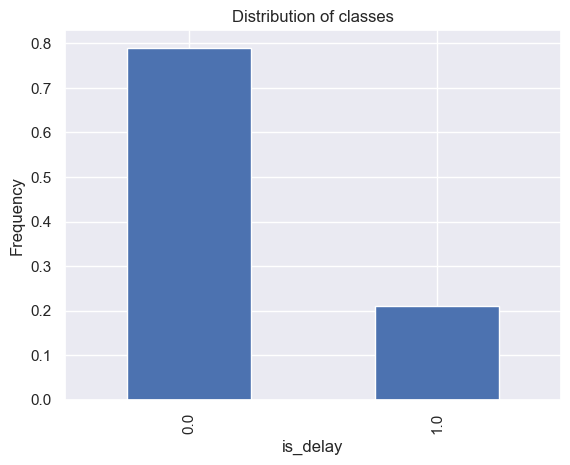

In [65]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

- The bar plot shows the distribution of two classes: 0.0 i.e no delay and 1.0 i.e delay(15 min or more)
- The bar for 0.0 is much taller than the 1.0 class showing that majority (almost 80%) of the flights were not delayed.
- It also showed the imbalance in the data with 80% of the daya points belonginf to class 0.0 .
- This imbalance can cause model bias where the models will favour the majority class and will thus reduce the predictive performance. 

In [68]:
# Calculate the count of each class
class_counts = data['is_delay'].value_counts()

# Calculate the proportions
class_counts / len(data)

is_delay
0.0    0.790087
1.0    0.209913
Name: count, dtype: float64

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

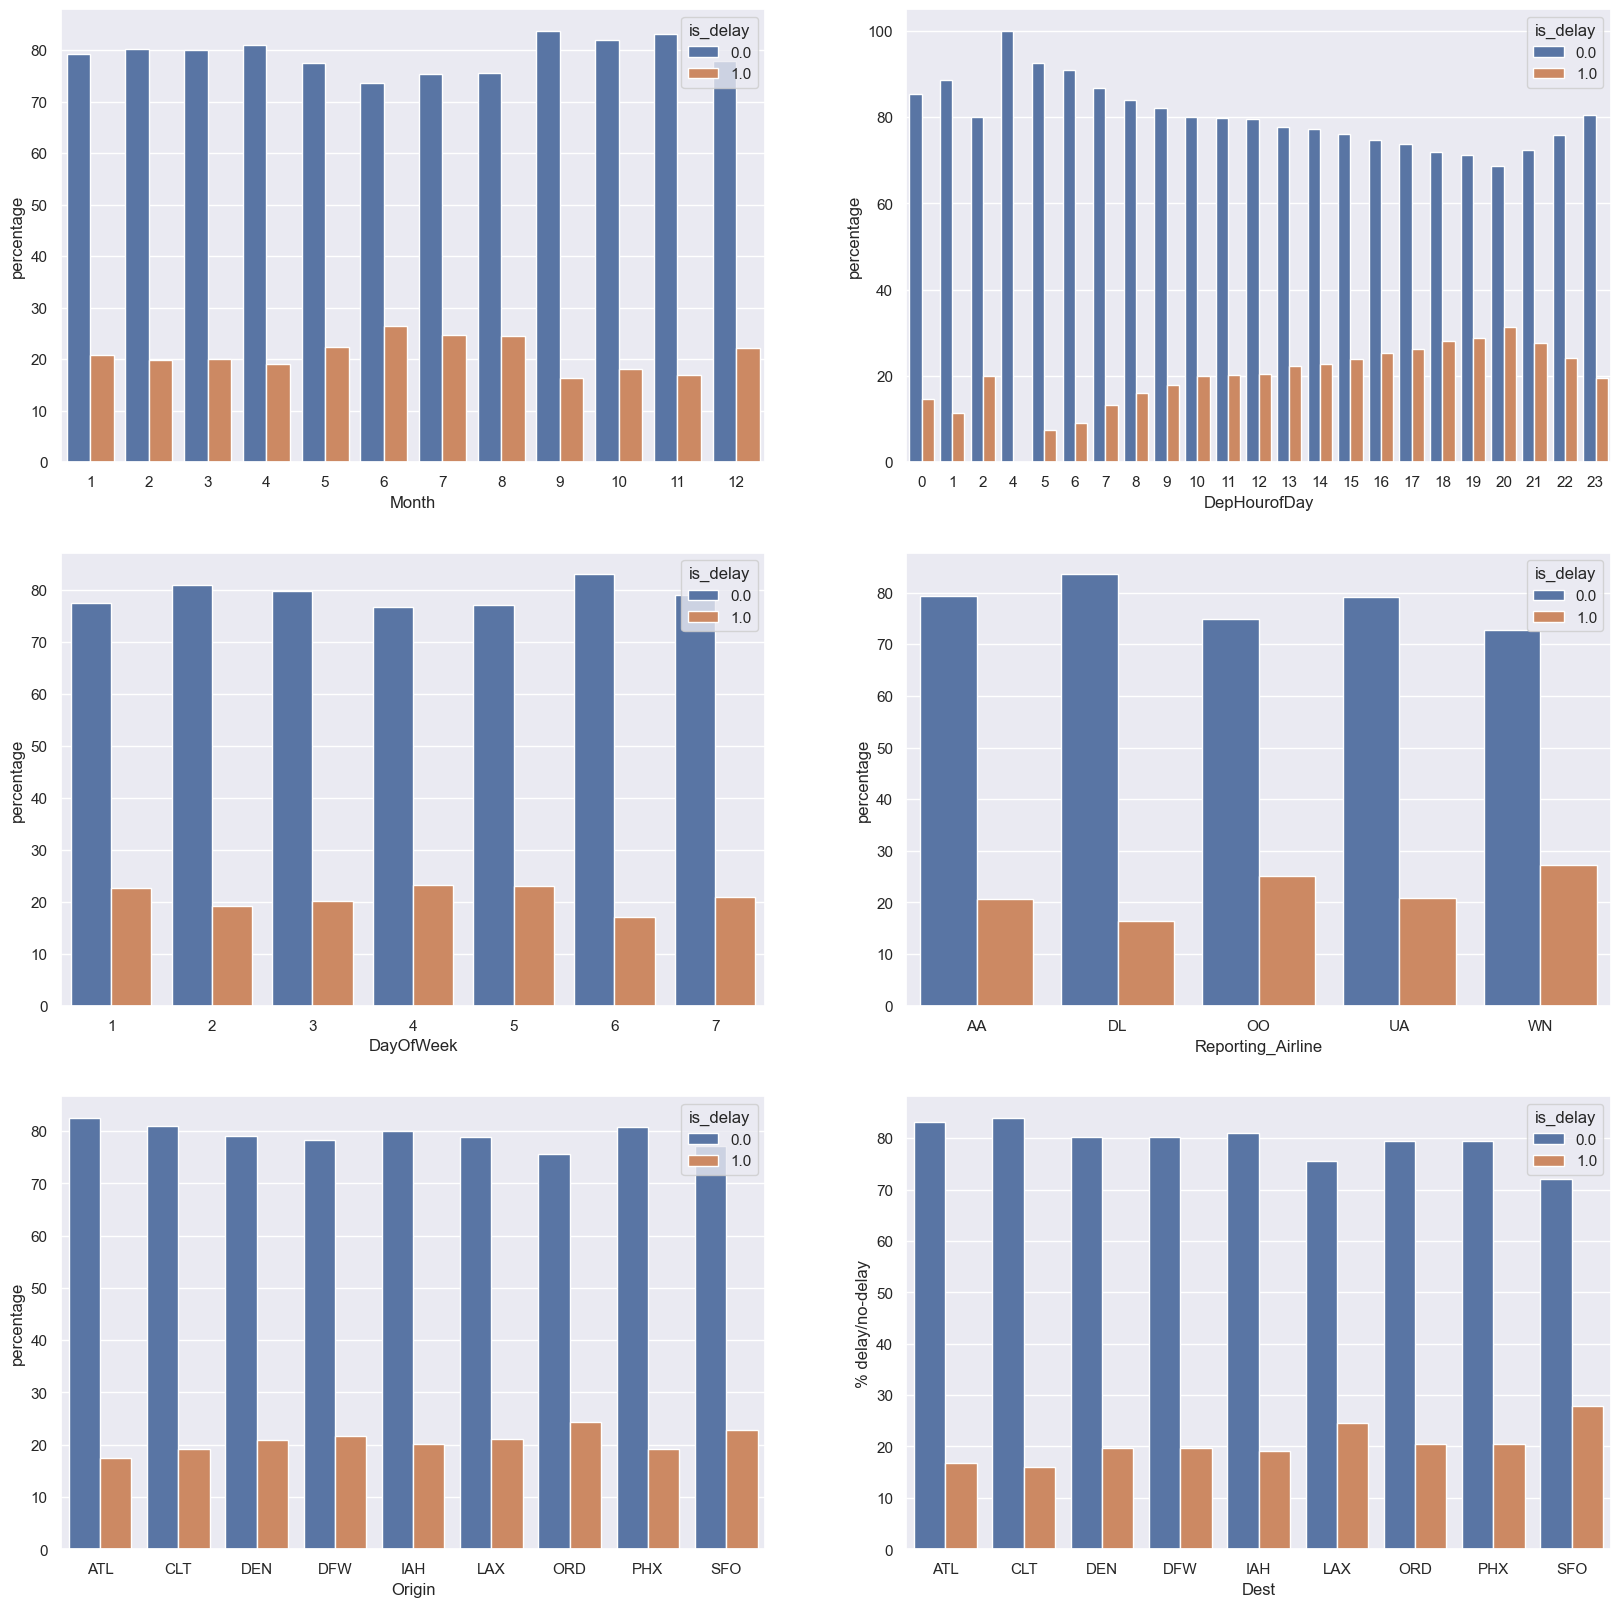

In [70]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
     

plt.show()

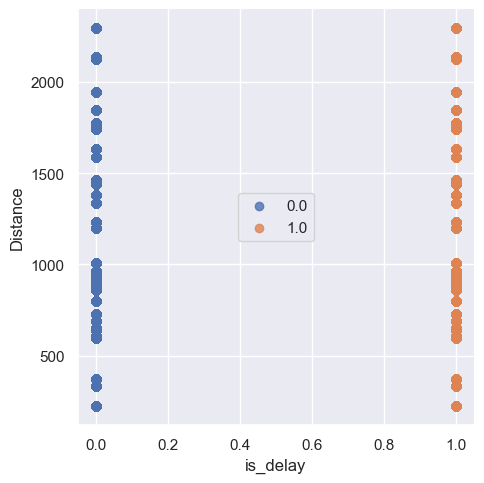

In [71]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

In [72]:
# Calculate the proportion of delays by DistanceGroup
distance_delay_counts = data.groupby('DistanceGroup')['is_delay'].value_counts(normalize=True).unstack()

distance_delay_counts



is_delay,0.0,1.0
DistanceGroup,,
1,0.831194,0.168806
2,0.730023,0.269977
3,0.802577,0.197423
4,0.783508,0.216492
5,0.823206,0.176794
6,0.795231,0.204769
7,0.796453,0.203547
8,0.779456,0.220544
9,0.814089,0.185911


<Figure size 1200x600 with 0 Axes>

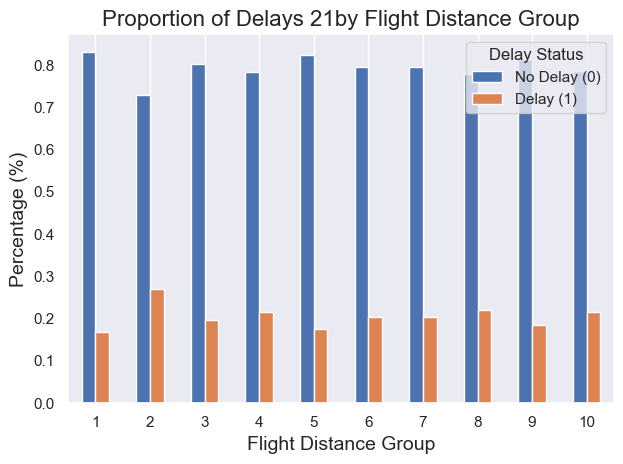

In [73]:
# Plotting
plt.figure(figsize=(12, 6))
# Use distance_delay_counts to plot the percentages
distance_delay_counts.plot(kind='bar', stacked=False)

# Set the title and labels
plt.title('Proportion of Delays 21by Flight Distance Group', fontsize=16)
plt.xlabel('Flight Distance Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0)  # Keep x-tick labels horizontal
plt.legend(title='Delay Status', labels=['No Delay (0)', 'Delay (1)'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

**Questions**: 

#### 1.  Which months have the most delays?
#### Answer: 
As we can see in the first graph the month of June has the most number of delays.

#### 2. What time of the day has the most delays?
#### Answer:
In the second we can see that the most no. of delays happened in the flight departed between 8pm and 9 pm (20 - 21)
#### 3. What day of the week has the most delays?
#### Answer:
Day 4 and day 5 of the week show approximately 23% of delays.
 
#### 4. Which airline has the most delays?
#### Answer:
In the reporting airlines graph we can see clearly that the airline "WN" has the most delays with almost 27%.

#### 5. Which origin and destination airports have the most delays?
#### Answer:
- The origin airports named "ORD" has the highest percentage(24%) of delayed flights.
- The destination airports named "SFO" has the highest percentage(28%) of delayed flights.

 #### 6. Is flight distance a factor in the delays?
#### Answer:
- The relationship between flight distance and delay is not completely linear. The longer flights tend to experience more delays as seen that every distance group over group 6 have over 20% delays.  
- But there are a couple of exceptions as well(Group 2 and group 9)which shows that even though distance is onbe of the factors to flight delays but there are other factors as well affecting the delays. 

### Features

Look at all the columns and what their specific types are.

In [76]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [77]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [79]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

In [80]:
print(data.dtypes)

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


In [81]:
data['DepHourofDay'].head()

0    7
1    7
2    7
3    7
4    7
Name: DepHourofDay, dtype: category
Categories (23, int64): [0, 1, 2, 4, ..., 20, 21, 22, 23]

In [82]:
#Bucketize the DepHourofDay column into time periods
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'

data['DepHourofDay'] = data['DepHourofDay'].apply(categorize_hour)

In [83]:
data['DepHourofDay'].head()

0    Morning
1    Morning
2    Morning
3    Morning
4    Morning
Name: DepHourofDay, dtype: object

In [84]:
data.head()

,is_delay,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,Distance,DepHourofDay
0,0.0,4,10,1,3,AA,DFW,SFO,1464.0,Morning
1,1.0,4,10,2,4,AA,DFW,SFO,1464.0,Morning
2,0.0,4,10,3,5,AA,DFW,SFO,1464.0,Morning
3,0.0,4,10,4,6,AA,DFW,SFO,1464.0,Morning
4,0.0,4,10,5,7,AA,DFW,SFO,1464.0,Morning


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [86]:
print(data.dtypes)

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay           object
dtype: object


In [87]:
data_dummies = pd.get_dummies(data[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                                     'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']], drop_first=True) # Enter your code here
data = pd.concat([data[['is_delay', 'Distance']], data_dummies], axis = 1)


Check the length of the dataset and the new columnms.

In [89]:
len(data)

1635590

In [90]:
data.shape

(1635590, 75)

In [91]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

In [92]:
# Enter your coade here

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [95]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [96]:
# Start the timer
start = time.time()

# Save the DataFrame to a CSV file
data.to_csv('/Users/VSR/Desktop/data_compressed/final file/combined_csv_v1.csv', index=False)

# Calculate the time taken and print it
print(f'CSV saved in {round((time.time() - start) / 60, 2)} minutes')

CSV saved in 0.23 minutes


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [99]:
# Seperate dependent and independent variable.
X = data.drop(columns=['target'])  
y = data['target']

In [100]:
X.shape, y.shape

((1635590, 74), (1635590,))

In [101]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [102]:
print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Train data shape: (1308472, 74)
Test data shape: (327118, 74)


### Baseline classification model

In [104]:
# intiate the model
model_classification = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)

In [105]:
# fit the model
model_classification.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [106]:
#Predict on the test set
y_pred = model_classification.predict(X_test)
# Predictions on the training set
y_train_pred = model_classification.predict(X_train)

In [107]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5887


In [108]:


# Calculate TN, FP, FN, TP for specificity using confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)

tn_train = cm1[0, 0]  # True Negatives
fp_train = cm1[0, 1]  # False Positives
fn_train = cm1[1, 0]  # False Negatives
tp_train = cm1[1, 1]  # True Positives

# Calculate and print metrics for the training set
print('Training accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred)))
print('Training precision score: {0:0.4f}'.format(precision_score(y_train, y_train_pred)))
print('Training recall (sensitivity) score: {0:0.4f}'.format(recall_score(y_train, y_train_pred)))
print('Training specificity score: {0:0.4f}'.format(tn_train / (tn_train + fp_train)))

Training accuracy score: 0.5899
Training precision score: 0.2805
Training recall (sensitivity) score: 0.6091
Training specificity score: 0.5848


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [111]:
# Calculate and print performance metrics
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred)))
print('Model recall (sensitivity) score: {0:0.4f}'.format(recall_score(y_test, y_pred)))

# Calculate TN, FP, FN, TP 
cm = confusion_matrix(y_test, y_pred)

tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives
tp = cm[1, 1]  # True Positives


# Print specificity
print('Model specificity score: {0:0.4f}'.format(tn / (tn + fp)))

Model accuracy score: 0.5887
Model precision score: 0.2800
Model recall (sensitivity) score: 0.6108
Model specificity score: 0.5828


In [112]:
def plot_confusion_matrix(test_labels, target_predicted):
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Delay (0)', 'Delay (1)'],
                yticklabels=['No Delay (0)', 'Delay (1)'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [113]:
from sklearn import metrics


def plot_roc(test_labels, target_predicted):
    # Calculate false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    
    # Calculate the area under the ROC curve (AUC)
    auc = metrics.roc_auc_score(test_labels, target_predicted)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

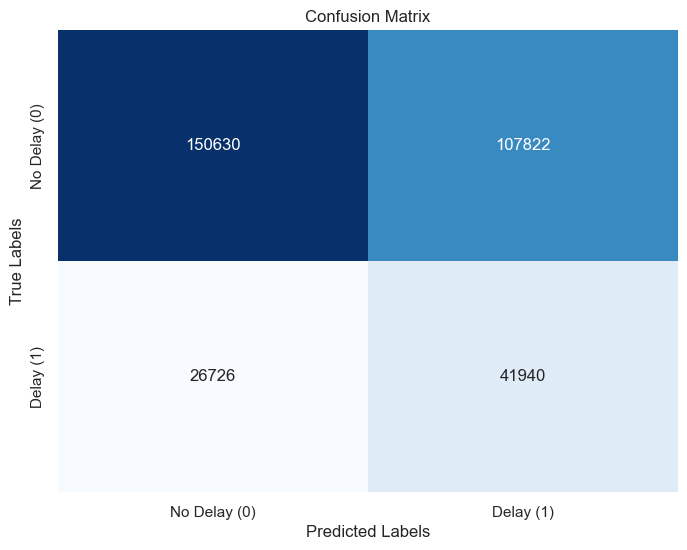

In [115]:
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

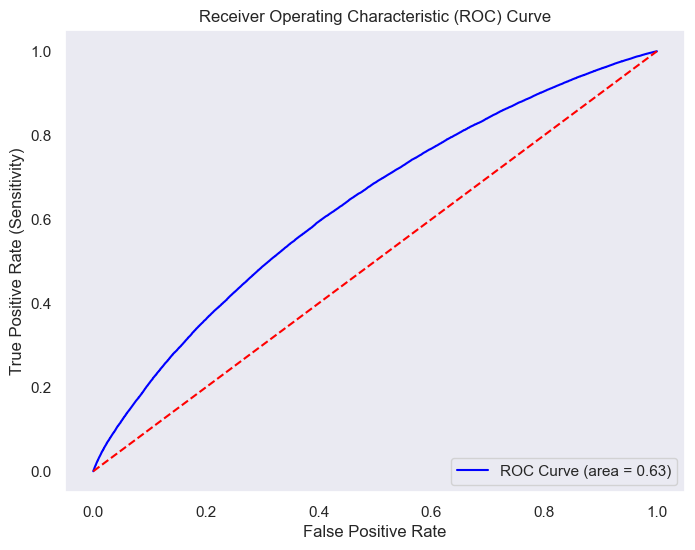

In [117]:
# Predict probabilities for the positive class
y_proba = model_classification.predict_proba(X_test)[:, 1]

# Plot the ROC curve
plot_roc(y_test, y_proba)

We tried different configurations for logistic regression, trying different solvers like lbfgs, liblinear, and saga, as well as penalties l1 and l2, but could not achieve balanced results across metrics. With parameters set as LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear'), we obtained the most balanced performance. While some parameters yielded higher accuracy, they gave  very low recall, which indicates that the model is unable to correctly identify actual positive cases, leading to unclassified flight delays. This is due to the Class imbalanceas the class 0 is almost four times the class 1 and the model may become biased towards predicting the majority class.

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

#### 1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?
#### Answer:
The model’s performance on the test set is very similar to that on the training set, with almost similar accuracy and  precision, recall, and specificity metrics are close in both cases.This consistency shows that that the model generalizes well and there isn't much overfitting. However, the low precision and moderate recall in both test and train set indicates that the model struggles to accurately identify the delay class which is key issue for this business problem .

We can deduce that the features we used are not adequate to properly jidge whether the flight is going to be delayed. Also logistic regression may not be able to recognize the patterns in the data due to the class imbalance and higher bias.

#### 2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 
#### Answer:
The scores for accuracy,precision,recall,specificity are very similar to each other showing the consistecy of the model in both the training and testing data. the accuracy for both the data is aroung 58.9% . The precision is very low around 28% which means that we have a lot of false positives. The recall and specificity are also similar at 61% and 58 % respectively are slightly accceptable but still can be improved a lot. 

We might be seeing such fluctuations in the results due to the class imbalance which causes the bias in the model towards the majority class(0) and thus it struggles to identify the minority class properly. 


#### 3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

#### Answer :
The precision and recall I consider as the most important metrics. Precision of 28% is not acceptable from a business standpoint. It means that whenever our model prects that a flight will be delayed it is incorrect most of the times. Recall of 61% means that the model is missing almost 39% of the flight delays which can hugely impact the reliability of our model. 

To overcome these limitations we need to :

- Feature selection: identify and use the most significant features.
- Create new features: Add more data features if available and create new relevant features from the data.
- Class imbalance: We need to handle the class imbalance using sampling techniques.
- Cross validation Techniques. 


**Question**: What can you summarize from the confusion matrix?


- **True Negatives (TN): 150,630**
From the confusion matrix we can easily find out that the true negatives is 150,630 stating that the model is good at identifying the flight correctly which are not delayed.
- **False Positives (FP): 107,822**
This high number indicates that the model has a significant number of incorrect predictions of delay when when the actual outcome was “No Delay”.
- **False Negatives (FN): 26,726**
These are when the model predicted “No Delay” incorrectly when the actual outcome was “Delay”.
- **True Positives (TP): 41,940**
These are instances where the model correctly predicted “Delay” (1). Although this number looks high, it still represents a very low proportion of the total number of actual delays.

We can conclude that the model is capable of idetifying no delays but we still need to work on it to improve its performance so that it can predict actual delays correctly. Further analysis and adjustment are required to achieve a more balanced and effective model

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task.
2. Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://github.com/VibhoreSinghUC/Final_Project

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [131]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [132]:

# Filter rows where FlightDate is '2014-01-01'
specific_date_rows = data_orig[data_orig['FlightDate'] == '2014-01-01']

# Display the filtered rows
print(specific_date_rows)

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
752877  2014        1      1           1          3  2014-01-01   
752885  2014        1      1           1          3  2014-01-01   
752899  2014        1      1           1          3  2014-01-01   
752951  2014        1      1           1          3  2014-01-01   
752952  2014        1      1           1          3  2014-01-01   
...      ...      ...    ...         ...        ...         ...   
773320  2014        1      1           1          3  2014-01-01   
773347  2014        1      1           1          3  2014-01-01   
773374  2014        1      1           1          3  2014-01-01   
773401  2014        1      1           1          3  2014-01-01   
773432  2014        1      1           1          3  2014-01-01   

       Reporting_Airline Origin OriginState Dest  ... CRSDepTime  Cancelled  \
752877                OO    ATL          GA  DEN  ...       1516        0.0   
752885                OO    DEN      

In [133]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)




Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [135]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [137]:
weather = pd.read_csv("/Users/VSR/Desktop/data_compressed/daily-summaries-2024-10-31T20-32-00.csv")

station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']




In [138]:
print(weather.columns)

Index(['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')


In [139]:
### Map weather stations to airport code
station_map = dict(zip(station, airports))

# Map the station codes to their respective airport codes in the weather DataFrame
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [141]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [144]:
weather.shape

(16434, 11)

In [145]:
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

In [146]:
# Impute missing values
weather['SNOW'] = weather['SNOW'].fillna(weather.groupby('MONTH')['SNOW'].transform('median'))

# Impute missing values in SNWD using the median of the grouped MONTH
weather['SNWD'] = weather['SNWD'].fillna(weather.groupby('MONTH')['SNWD'].transform('median'))

weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [148]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [151]:
weather_impute = weather.groupby(['STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,STATION,TAVG,TMAX,TMIN
0,USW00003017,112.931445,190.020263,32.978642
1,USW00003927,198.463308,256.026287,143.678532


Merge the mean data with the weather data.

In [153]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['STATION'], right_on = ['STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [155]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [157]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'airport', 'MONTH', 'TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG'],
      dtype='object')

In [158]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday'],
      dtype='object')

In [159]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [161]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [163]:
sum(data.isna().any())

0

In [164]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [166]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [167]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [170]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [173]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [174]:
data.columns

Index(['target', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfW

In [175]:
data.head()

,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_1
0,0.0,1464.0,7,57,0,281.0,25,0,209.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,1.0,1464.0,7,72,81,284.0,11,0,226.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,1464.0,7,49,0,219.0,24,0,244.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,1464.0,7,29,0,182.0,30,0,247.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,1464.0,7,52,0,214.0,41,0,220.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [176]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# Start the timer
start = time.time()

# Save the DataFrame to a CSV file
data.to_csv('/Users/VSR/Desktop/data_compressed/final file/combined_csv_v2.csv', index=False)

# Calculate the time taken and print it
print(f'CSV saved in {round((time.time() - start) / 60, 2)} minutes')

CSV saved in 0.28 minutes


Create the training and testing sets again.

In [178]:
# Seperate dependent and independent variable.
X = data.drop(columns=['target'])  
y = data['target']

In [179]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [181]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)

In [182]:
classifier2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [183]:
y_pred = classifier2.predict(X_test)

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

In [185]:
# Calculate and print performance metrics
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred)))
print('Model recall (sensitivity) score: {0:0.4f}'.format(recall_score(y_test, y_pred)))

# Calculate TN, FP, FN, TP 
cm = confusion_matrix(y_test, y_pred)

tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives
tp = cm[1, 1]  # True Positives


# Print specificity
print('Model specificity score: {0:0.4f}'.format(tn / (tn + fp)))

Model accuracy score: 0.6445
Model precision score: 0.3178
Model recall (sensitivity) score: 0.6049
Model specificity score: 0.6550


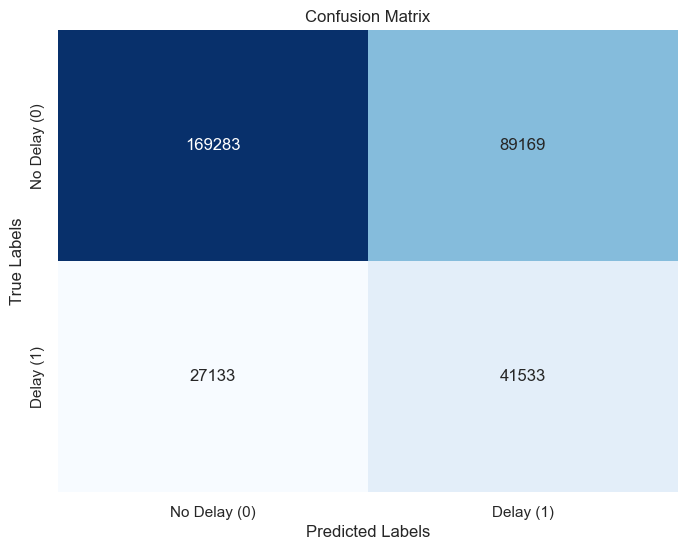

In [186]:
# Predict probabilities for the positive class
plot_confusion_matrix(y_test, y_pred)


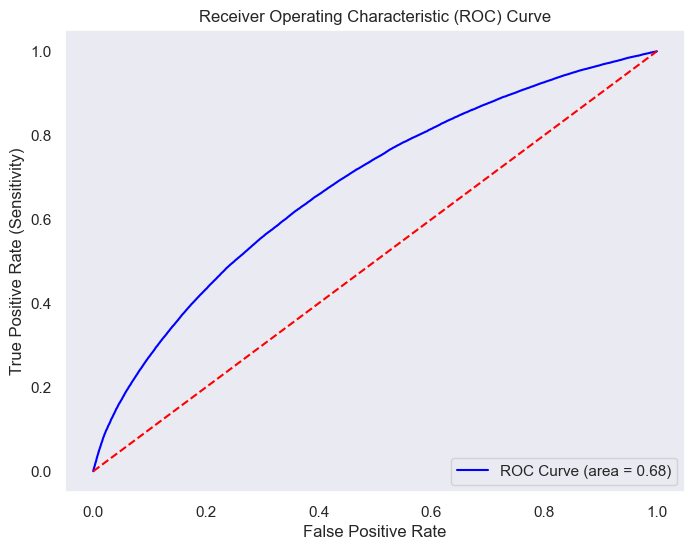

In [187]:
y_proba = classifier2.predict_proba(X_test)[:, 1]

# Plot the ROC curve
plot_roc(y_test, y_proba)

Question: did you notice a difference by adding the extra data on the results?

#### Answer:

- The accuracy , precision and specificity values icreased when we added new data but the recall decreased slightly.
- The additional data about weather and holidays provide more context about the flights delayed and slightly improved our data driven decisions as shown by precision, accuracy etc.
- Adding more feature can help better pattern recognising and hence better classifications.
- Even though the performance metrics improved slightly but it still requires a lot of improvements. Maybe we can try some more complex models.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/app/profile/vibhore.singh/viz/FlightsDelayDashboard_Vibhore/Dashboard1?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?


### Answer:
1. Currently, the model performance may not fully meet the business goal. While it can identify delays to an extent, metrics such as recall and precision are likely lower than desired for accurately predicting flight delays.
2. with the second iteration of feature engineering and additional data  we saw small improvements to recall and precision.The  engineering features like the presence of snow or average temperatures helped us get more insights on the target variable. These adjustments helped the model capture patterns in delays more effectively, although further improvements are needed.
3. Class imbalance was the biggest problem we faced. The rarity of class 1 made it harder for the model to learn  properly and created a bias for class 0.
4. We learnt the effect of massively imbalanced datasets on model performance. and also we learnt how adding addition information to the data can help models learn better. The importance of good data preprocessing and feature engineering. 